My suggestion is to run each one of these on its own model.

I also attempt to prepare the data for a more simple model by aggregating the data at the end of the document

Queries:
- aspiii (derived)
- chemistry (derived)
- creatine_baseline (derived)
- epinephrine (TS) (derived)
- first_day (derived)
- creatine (derived)
- vitalsign (derived)
- vasopressors_input (icu)
- gastrointensintal_chart (icu)
- position_chart (icu)
- skin_chart (icu)
- saline_input (TS) (icu)
- epinephrine_input (TS) (icu)
- h1Antihistamines (TS) (hosp)
- h2Antihistamines (TS) (hosp)
- bronchodilators (TS) (hosp)
- glucocorticoids (TS) (hosp)
- vasopressers_pharmacy (TS) (hosp)
- diagnosis (hosp)

#SETUP

In [ ]:
# Import libraries
from datetime import timedelta
import os

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display, HTML, Image
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

# authenticate
auth.authenticate_user()

# Set up environment variables
project_id = 'stoked-sanctum-433501-f8'
if project_id == 'CHANGE-ME':
  raise ValueError('You must change project_id to your GCP project.')
os.environ["GOOGLE_CLOUD_PROJECT"] = project_id

# Read data from BigQuery into pandas dataframes.
def run_query(query, project_id=project_id):
  return pd.io.gbq.read_gbq(
      query,
      project_id=project_id,
      dialect='standard')

# set the dataset
# if you want to use the demo, change this to mimic_demo
dataset = 'mimiciv'

Pending attributes to summarize

One by one, we display statistics and basic summary.

We make plots where applicapable and when they seem useful/interesting.

*Unsure if fore final report we need plots of everything?

#ASPiii

In [ ]:
aspiii=run_query("""SELECT
  subject_id, hadm_id, apsiii, apsiii_prob, hr_score, resp_rate_score, creatinine_score
  FROM physionet-data.mimic_derived.apsiii
  LIMIT 100--for testing only""")##not sure if useful

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


# Chemistry

In [ ]:
chemistry=run_query("""SELECT
  subject_id, hadm_id, charttime as charttime_chemistry, specimen_id, creatinine
  FROM physionet-data.mimic_derived.chemistry
  LIMIT 1000--for testing only""")

chemistry.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,subject_id,hadm_id,charttime_chemistry,specimen_id,creatinine
0,11315158,29744670,2139-04-19 12:15:00,2167947,6.8
1,19498855,29115671,2189-08-24 08:57:00,67406494,5.8
2,19339132,20204398,2190-03-04 18:12:00,81683754,2.9
3,14108608,<NA>,2203-05-19 13:50:00,35692293,4.4
4,13760745,23723366,2183-10-18 06:14:00,70194212,6.2


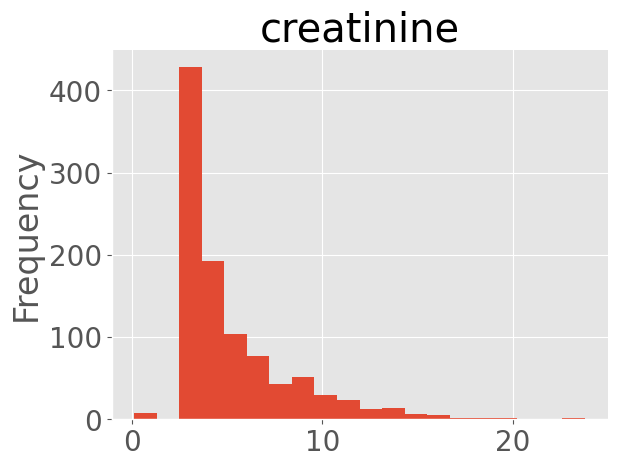

In [ ]:
# @title creatinine

from matplotlib import pyplot as plt
chemistry['creatinine'].plot(kind='hist', bins=20, title='creatinine')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
aggregated_creatinine = chemistry.groupby(['subject_id', 'hadm_id'])['creatinine'].agg(['mean', 'min', 'max'])
aggregated_creatinine

,,mean,min,max
subject_id,hadm_id,,,
10013569,27993048,2.80,2.8,2.8
10038081,20755971,3.90,3.9,3.9
10059406,23005038,5.20,5.2,5.2
10098215,28763146,2.80,2.8,2.8
10119992,27298430,4.50,4.5,4.5
...,...,...,...,...
19939978,20499913,7.40,7.4,7.4
19942499,26012877,10.55,10.4,10.7
19963068,20111271,6.10,6.1,6.1


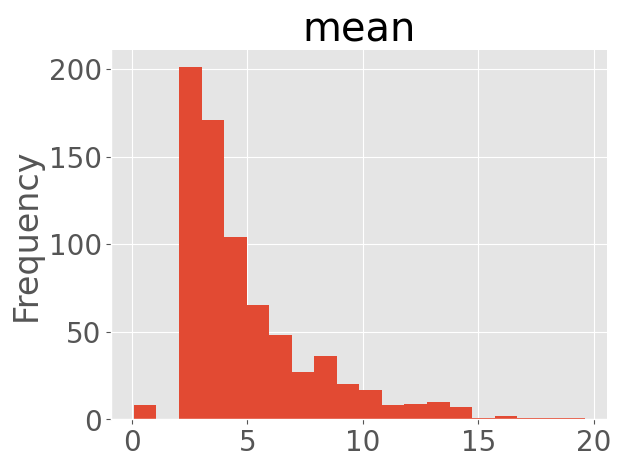

In [ ]:
from matplotlib import pyplot as plt
aggregated_creatinine['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Creatine baseline

In [ ]:
creatine_baseline=run_query("""SELECT
    *
  FROM physionet-data.mimic_derived.creatinine_baseline c --think this will be usful but not sure how yet
  LIMIT 1000--for testing only""")
creatine_baseline.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,hadm_id,gender,age,scr_min,ckd,MDRD_est,scr_baseline
0,28354474,F,66,NaN,1,0.811774,NaN
1,27002487,F,66,NaN,1,0.811774,NaN
2,23285822,F,66,NaN,1,0.811774,NaN
3,28055611,F,66,NaN,1,0.811774,NaN
4,20597250,F,66,NaN,1,0.811774,NaN


In [ ]:
creatine_baseline.describe()

,hadm_id,age,scr_min,ckd,MDRD_est,scr_baseline
count,1000.0,1000.0,754.000000,1000.0,1.000000e+03,959.000000
mean,25012380.371,66.0,0.988196,0.171,8.117740e-01,0.913196
std,2885361.383649,0.0,1.028650,0.376697,1.943862e-14,0.889610
min,20011505.0,66.0,0.500000,0.0,8.117740e-01,0.500000
25%,22558514.75,66.0,0.500000,0.0,8.117740e-01,0.500000
50%,24879767.0,66.0,0.500000,0.0,8.117740e-01,0.811774
75%,27542605.75,66.0,1.000000,0.0,8.117740e-01,1.000000
max,29990599.0,66.0,11.000000,1.0,8.117740e-01,11.000000


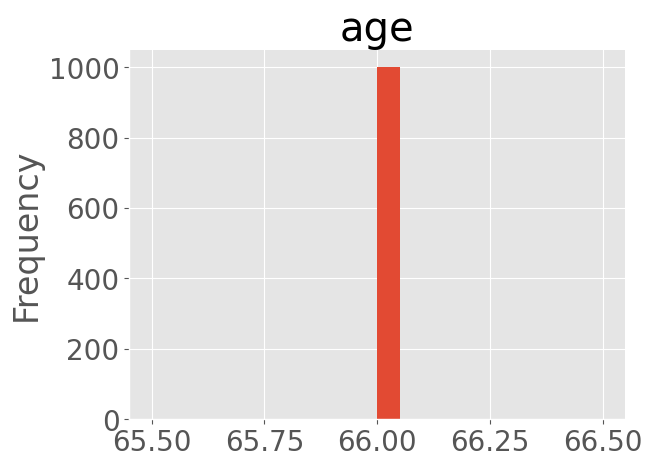

In [ ]:
from matplotlib import pyplot as plt
creatine_baseline['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

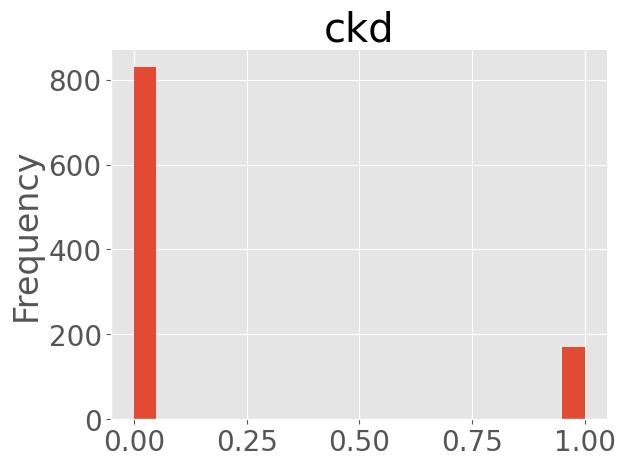

In [ ]:
from matplotlib import pyplot as plt
creatine_baseline['ckd'].plot(kind='hist', bins=20, title='ckd')
plt.gca().spines[['top', 'right',]].set_visible(False)

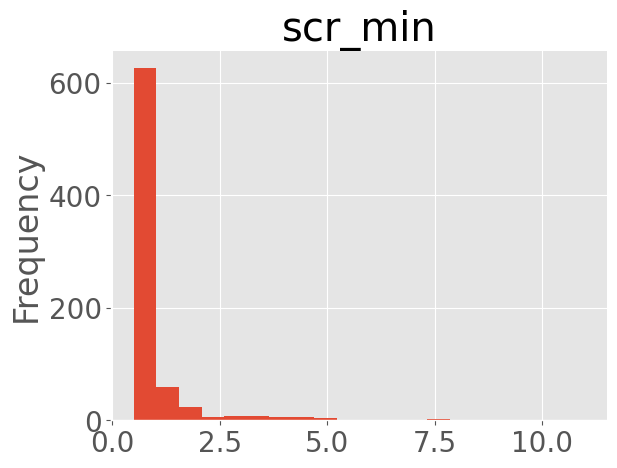

In [ ]:
from matplotlib import pyplot as plt
creatine_baseline['scr_min'].plot(kind='hist', bins=20, title='scr_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Epipnephrine

In [ ]:
epinephrine=run_query("""SELECT
    subject_id, e.stay_id, hadm_id,linkorderid,vaso_rate,vaso_amount,starttime,endtime
  FROM physionet-data.mimic_derived.epinephrine e
  JOIN physionet-data.mimic_derived.icustay_detail s
    ON e.stay_id=s.stay_id
  LIMIT 10000--for testing only""")##may be a duplicate
epinephrine.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,subject_id,stay_id,hadm_id,linkorderid,vaso_rate,vaso_amount,starttime,endtime
0,17555976,30137137,21018041,8390769,0.125313,1.061404,2140-12-17 07:30:00,2140-12-17 09:31:00
1,18777918,37270064,24753501,4405015,0.120302,0.767000,2157-06-02 20:00:00,2157-06-02 21:32:00
2,18777918,37270064,24753501,4405015,0.180147,2.297086,2157-06-02 09:11:00,2157-06-02 12:15:00
3,18777918,37270064,24753501,4405015,0.150397,4.846468,2157-06-02 12:15:00,2157-06-02 20:00:00
4,18777918,37270064,24753501,4474932,0.295569,0.143380,2157-06-01 19:37:00,2157-06-01 19:44:00


In [ ]:
epinephrine.describe()

,subject_id,stay_id,hadm_id,linkorderid,vaso_rate,vaso_amount,starttime,endtime
count,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000,10000
mean,14931968.0547,35133666.1324,25080732.1458,5008051.9175,0.198305,1.391711,2154-03-14 10:12:37.019999,2154-03-14 12:49:50.256000
min,10002760.0,30003749.0,20003587.0,1210.0,0.000864,0.000112,2110-03-16 07:50:00,2110-03-16 08:38:00
25%,12211587.0,32670942.0,22641078.0,2561357.0,0.029913,0.107482,2136-09-10 19:18:00,2136-09-10 23:35:30
50%,14879136.0,34962562.0,25210199.0,5125674.5,0.050252,0.368295,2155-12-23 12:57:30,2155-12-23 13:12:30
75%,17536222.0,37802486.0,27382401.0,7385291.75,0.130278,1.351644,2172-10-13 16:10:45,2172-10-14 00:04:15
max,19997367.0,39995735.0,29981955.0,9999364.0,41.142862,1707.178017,2208-06-27 01:22:00,2208-06-27 02:31:00
std,2936646.433655,2936706.43773,2835548.23902,2856515.532715,0.662510,17.414156,NaN,NaN


This table, as with all of the tables that have a starttime and endtime are time-series tables and are bit harder to work with. I it's best each of them to be treated sperately and fed into its own model to see if any yield useful information for our purposes.
I will also aggregate them here in case it is useful for them to be merged later per patient/hadm_id or by stay, depending on how we decide to use the data.


In [ ]:
# Aggregate epinephrine table by stay_id
aggregated_epinephrine = epinephrine.groupby('stay_id').agg({
    'vaso_rate': ['mean', 'min', 'max'],
    'vaso_amount': ['mean', 'min', 'max']
})

# Flatten the multi-level column index
aggregated_epinephrine.columns = ['_'.join(col) for col in aggregated_epinephrine.columns]

aggregated_epinephrine

,vaso_rate_mean,vaso_rate_min,vaso_rate_max,vaso_amount_mean,vaso_amount_min,vaso_amount_max
stay_id,,,,,,
30003749,0.291122,0.049877,0.502343,2.720322,0.081250,7.955201
30034142,0.014650,0.009300,0.020000,0.120638,0.112000,0.129277
30034749,0.019003,0.010001,0.030014,0.131289,0.041690,0.327335
30049159,0.069975,0.029969,0.100040,0.062094,0.012227,0.108844
30055302,0.076870,0.030225,0.150242,1.686066,0.063000,6.380119
...,...,...,...,...,...,...
39969447,0.150150,0.150150,0.150150,1.364865,1.364865,1.364865
39979502,0.027544,0.010016,0.050080,0.415625,0.298077,0.686538
39982460,0.034548,0.010000,0.064511,0.313874,0.016065,0.759018


# First day measurements

In [ ]:
first_day=run_query("""SELECT
    hadm_id, lab.subject_id,creatinine_min, creatinine_max,abs_eosinophils_min,abs_eosinophils_max
      ,vs.heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean
      ,vs.dbp_min,dbp_max,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean
      ,vs.spo2_min,spo2_max,spo2_mean
  FROM physionet-data.mimic_derived.first_day_lab lab
  FULL JOIN physionet-data.mimic_derived.first_day_vitalsign vs
    ON vs.subject_id=lab.subject_id AND vs.stay_id=lab.stay_id
  JOIN physionet-data.mimic_derived.icustay_detail s
    ON lab.stay_id=s.stay_id
    LIMIT 100--for testing only""")##maybe useful to check values against

first_day.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,hadm_id,subject_id,creatinine_min,creatinine_max,abs_eosinophils_min,abs_eosinophils_max,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,...,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,spo2_min,spo2_max,spo2_mean
0,25870544,13385850,0.9,1.0,NaN,NaN,59.0,89.0,79.111111,92.0,...,68.884615,69.0,119.0,84.884615,8.0,22.0,13.833333,93.0,100.0,99.296296
1,29215417,11425798,1.4,1.6,NaN,NaN,70.0,90.0,77.920000,85.0,...,63.880000,66.0,87.0,73.920000,9.0,27.0,13.692308,92.0,100.0,96.000000
2,21022172,16730806,1.9,2.1,NaN,NaN,65.0,131.0,89.458333,70.0,...,46.893617,41.0,106.0,59.510638,13.0,29.0,20.125000,89.0,100.0,96.395833
3,29391227,18702681,0.9,1.1,NaN,NaN,67.0,136.0,86.137931,81.0,...,54.241379,58.0,91.0,70.137931,11.0,20.0,17.045455,96.0,100.0,98.678571
4,28816224,13136352,1.1,1.4,NaN,NaN,75.0,96.0,84.692308,82.0,...,62.848485,61.0,102.0,77.606061,11.0,30.0,23.413793,94.0,100.0,96.692308


In [ ]:
first_day.describe()

,hadm_id,subject_id,creatinine_min,creatinine_max,abs_eosinophils_min,abs_eosinophils_max,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,...,dbp_mean,mbp_min,mbp_max,mbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,spo2_min,spo2_max,spo2_mean
count,100.0,100.0,100.000000,100.000000,0.0,0.0,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,24950681.54,15046133.91,1.462000,1.659000,NaN,NaN,76.740000,108.900000,91.308270,89.485000,...,63.572010,58.600000,102.24000,77.429592,12.980000,29.775000,19.878419,92.490000,99.410000,96.862047
std,2870650.647088,2944812.814664,1.426359,1.571405,NaN,NaN,16.387122,19.098628,15.906857,17.530703,...,11.042767,16.095046,23.86626,11.035337,3.907982,7.568333,4.492379,3.319654,1.215182,1.875072
min,20026629.0,10011668.0,0.100000,0.100000,NaN,NaN,30.000000,74.000000,60.111111,31.000000,...,41.958333,7.000000,68.00000,53.791667,1.000000,17.000000,12.560000,78.000000,94.000000,91.884615
25%,22439630.5,12236005.75,0.700000,0.900000,NaN,NaN,65.750000,95.750000,79.757151,79.875000,...,54.989583,52.000000,90.00000,68.077834,10.750000,25.000000,16.858529,91.000000,99.000000,95.697619
50%,24888169.5,15102816.5,1.000000,1.150000,NaN,NaN,74.000000,110.000000,91.762821,88.250000,...,62.890909,59.000000,99.00000,76.354167,13.000000,28.000000,19.054511,93.000000,100.000000,96.969362
75%,27238816.75,17545535.5,1.425000,1.700000,NaN,NaN,88.000000,119.250000,102.509073,99.250000,...,70.270497,67.000000,110.25000,85.459630,15.000000,34.000000,22.067909,95.000000,100.000000,98.296538
max,29985799.0,19747328.0,7.600000,7.900000,NaN,NaN,126.000000,162.000000,134.793103,144.000000,...,94.781250,96.000000,285.00000,106.875000,24.000000,63.000000,35.020000,100.000000,100.000000,100.000000


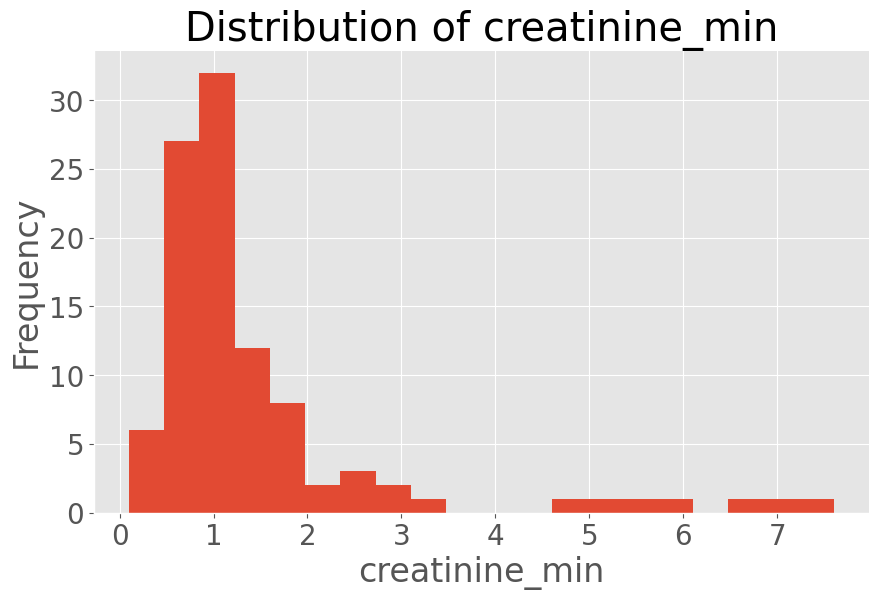

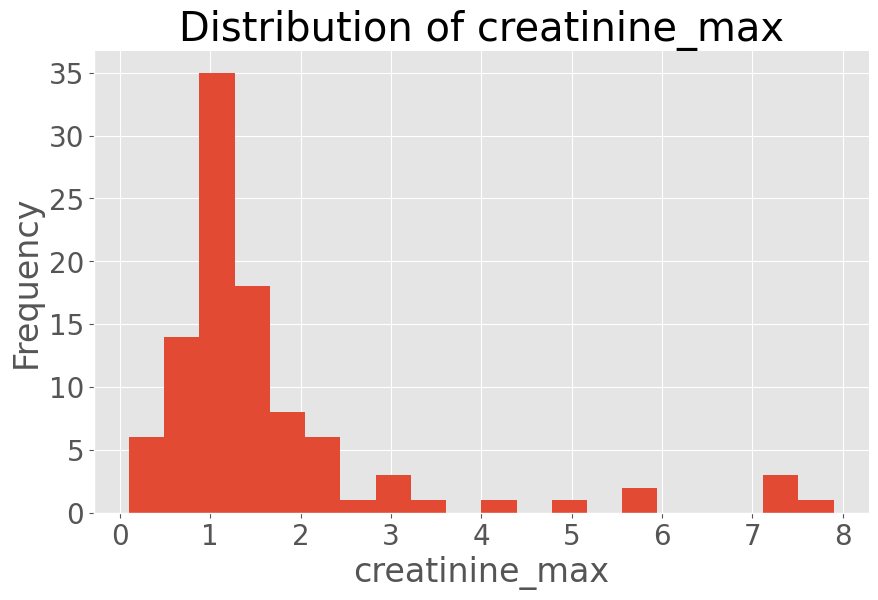

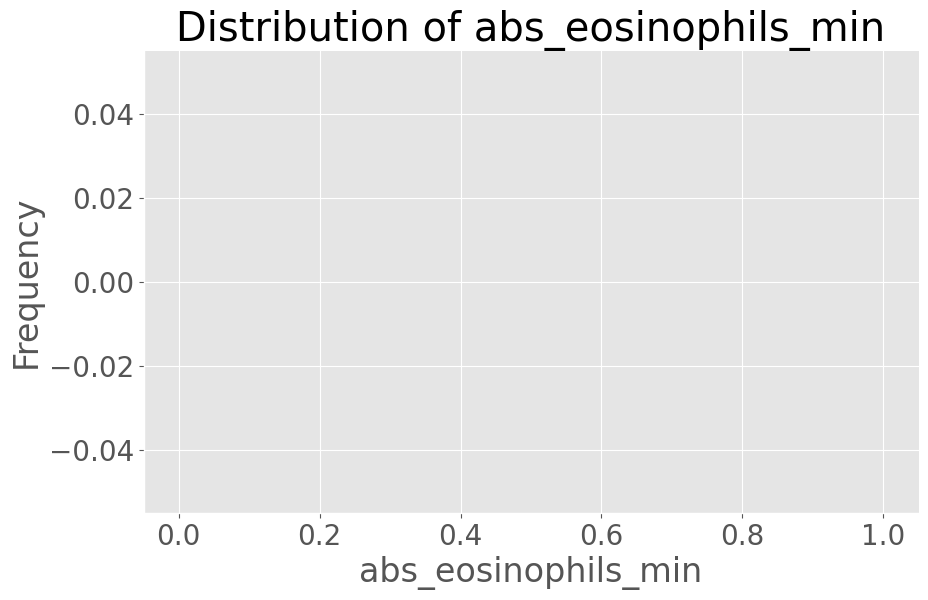

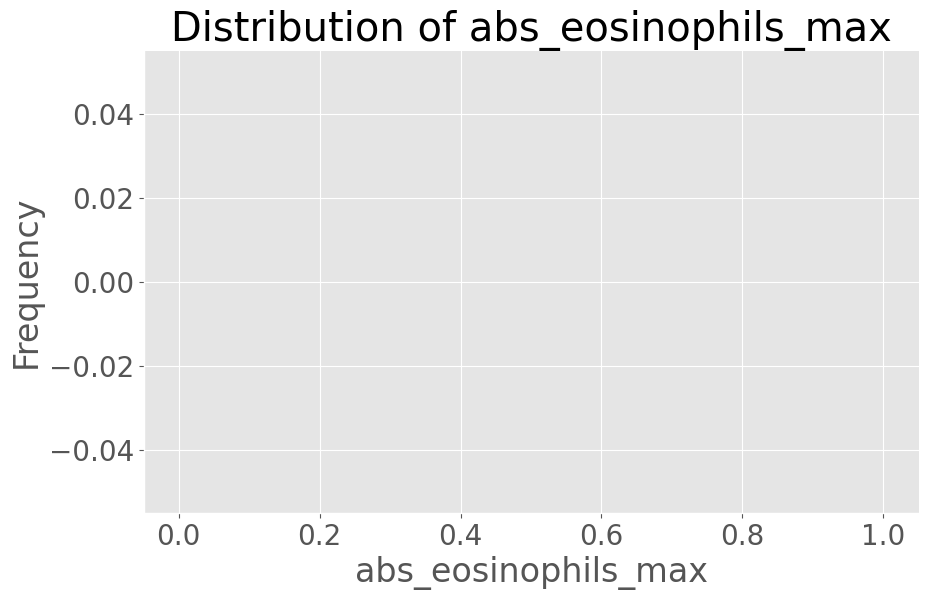

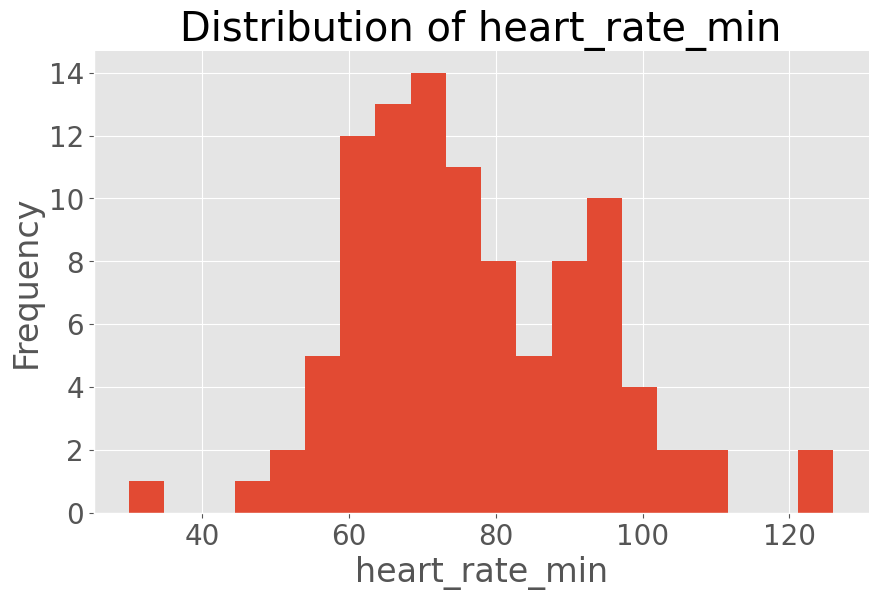

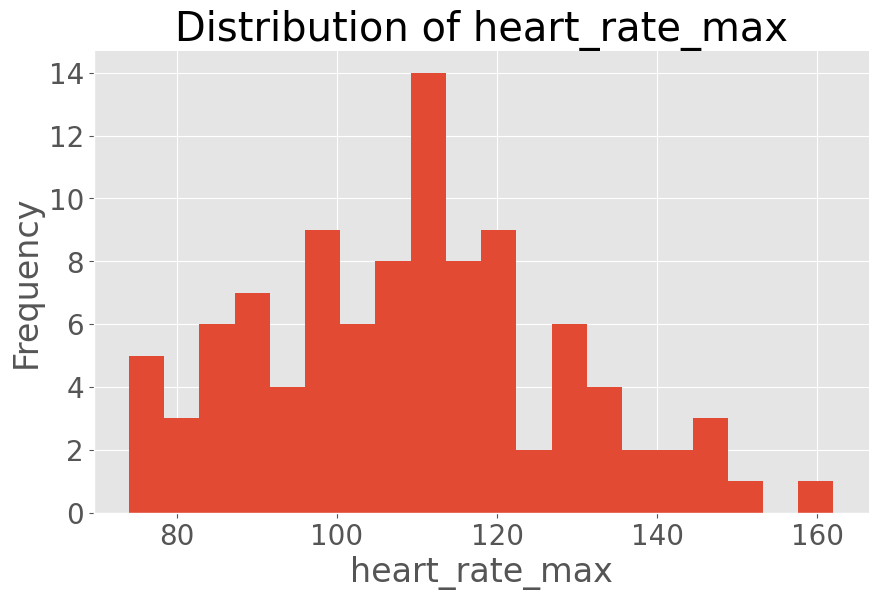

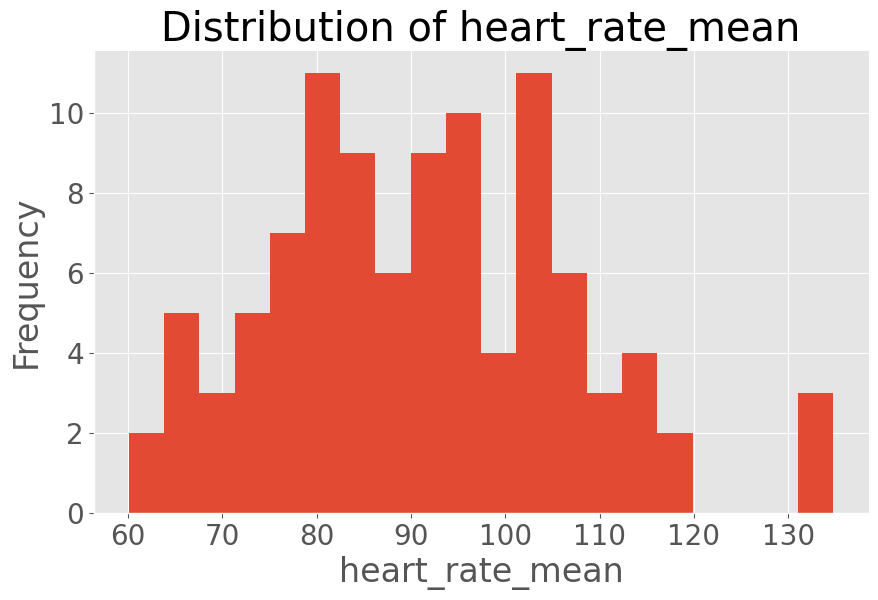

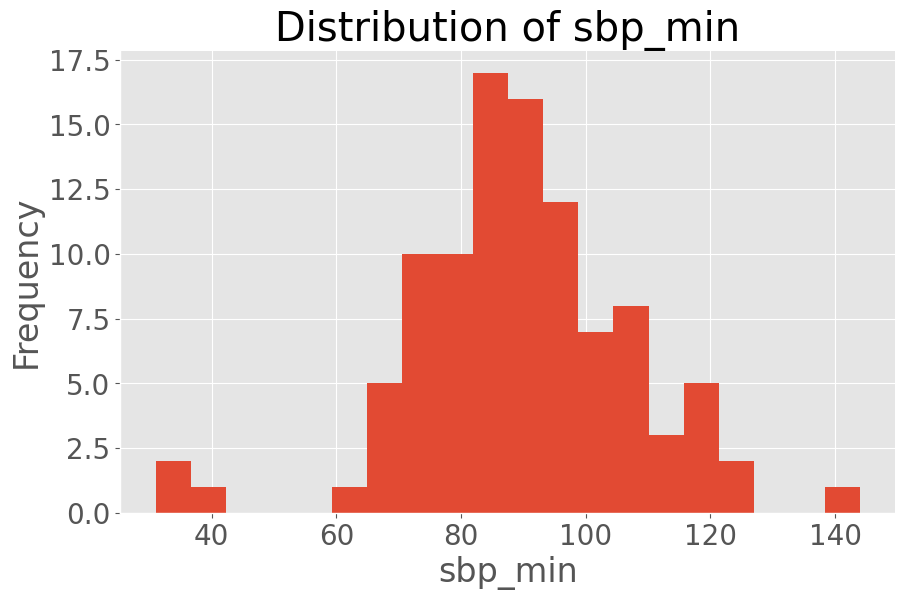

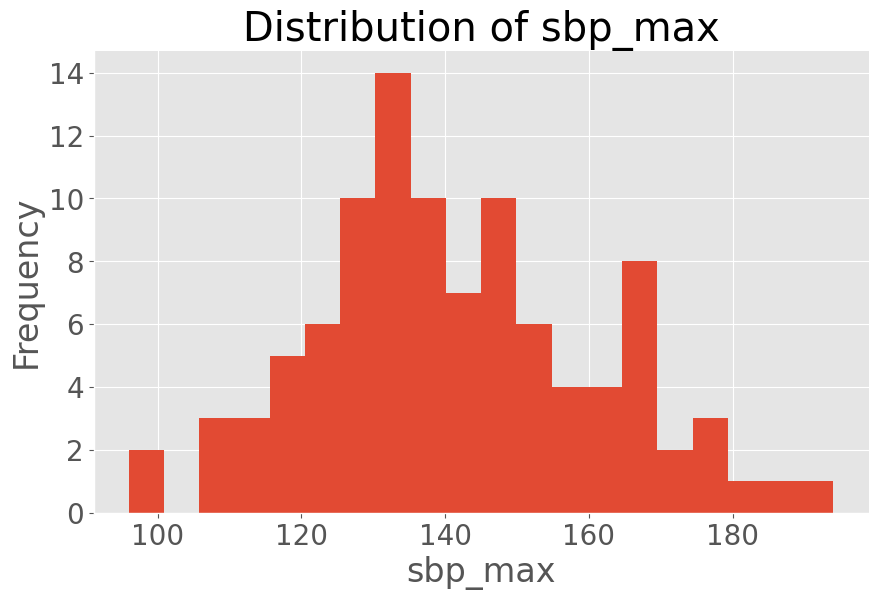

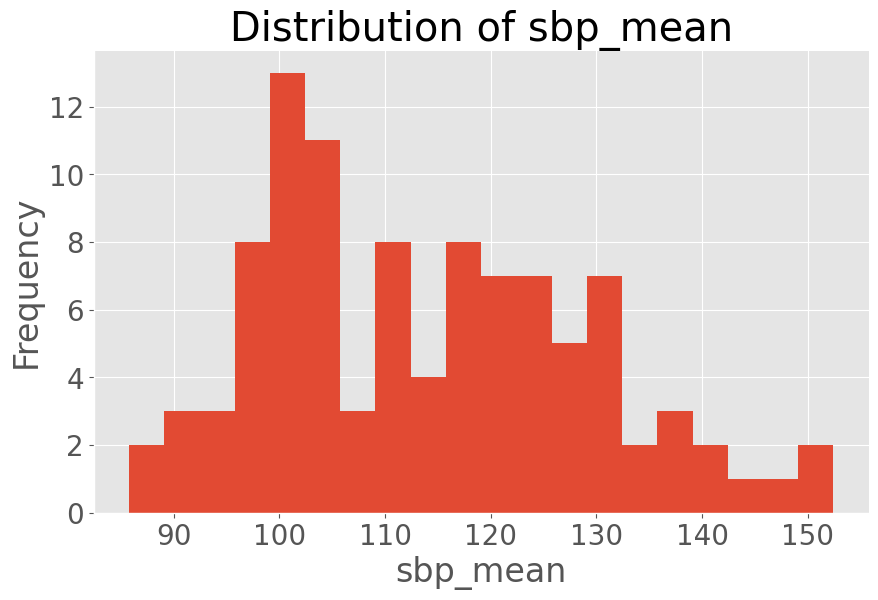

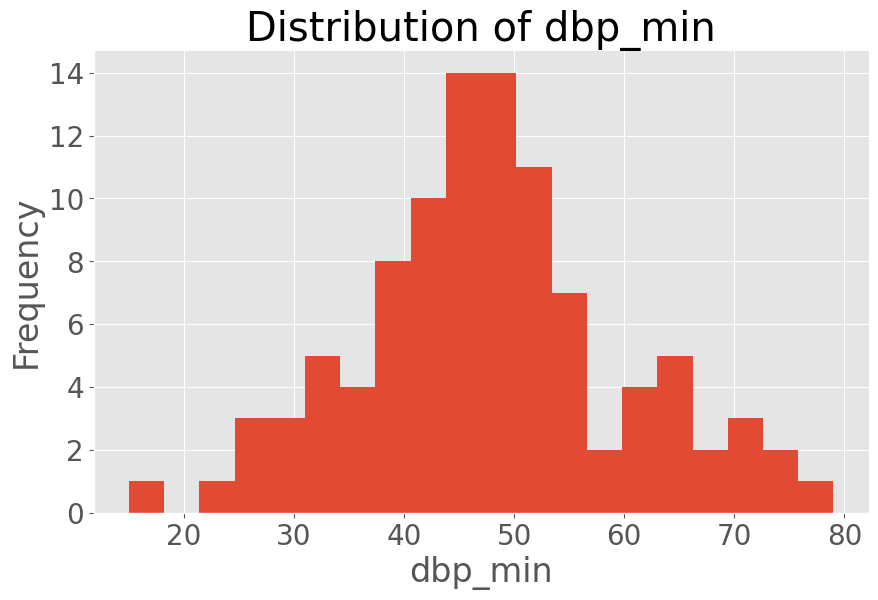

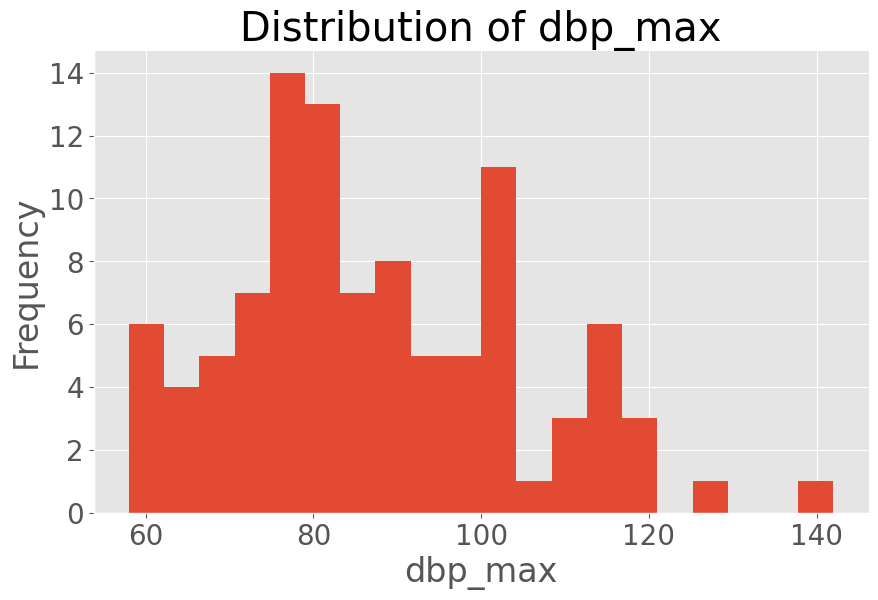

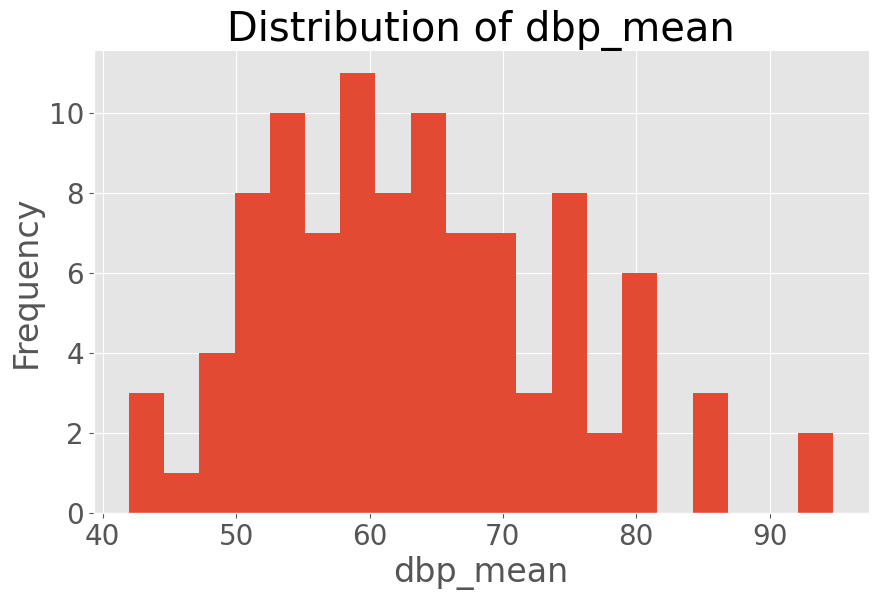

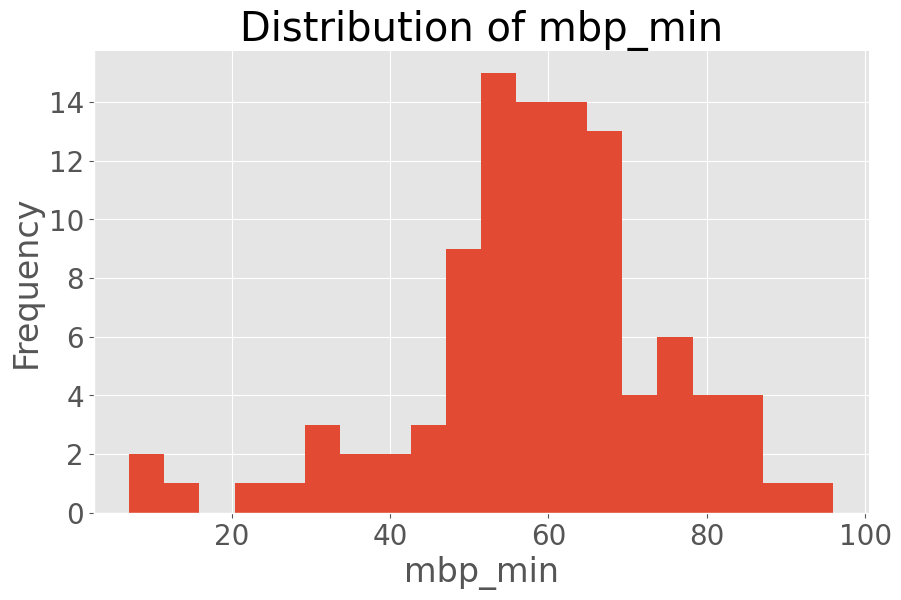

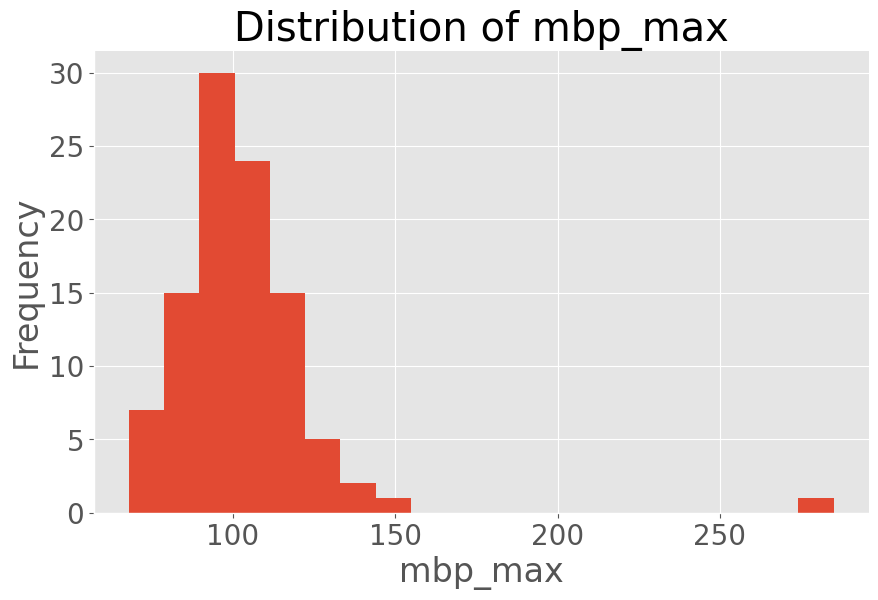

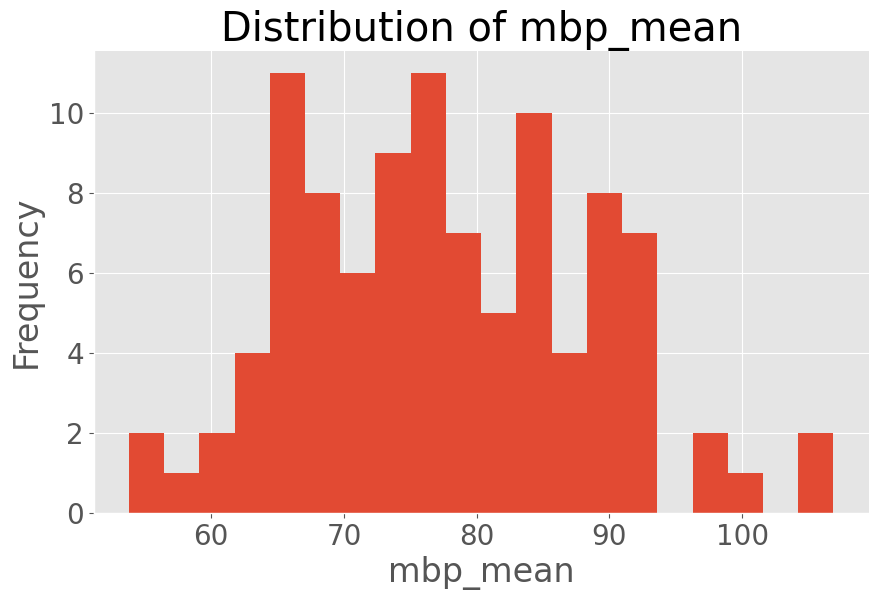

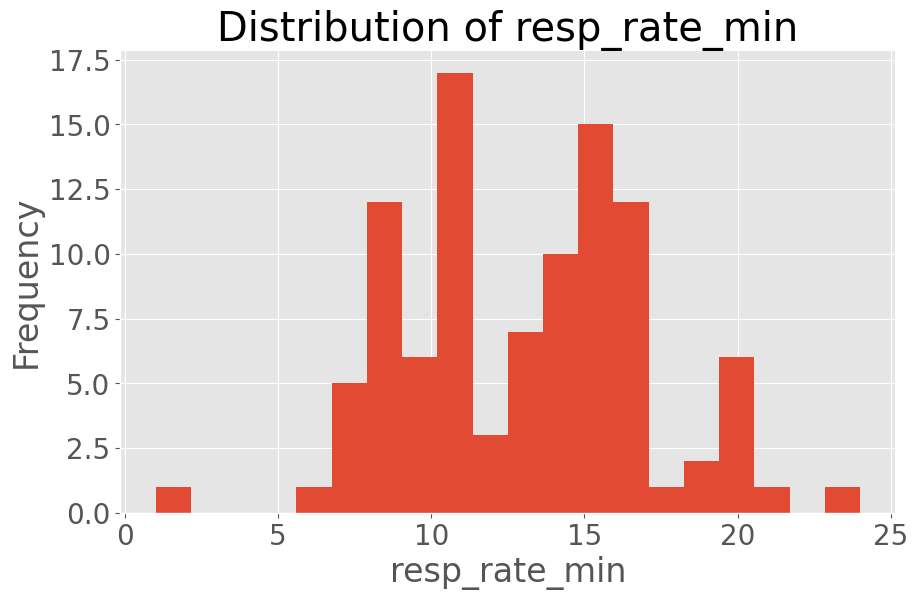

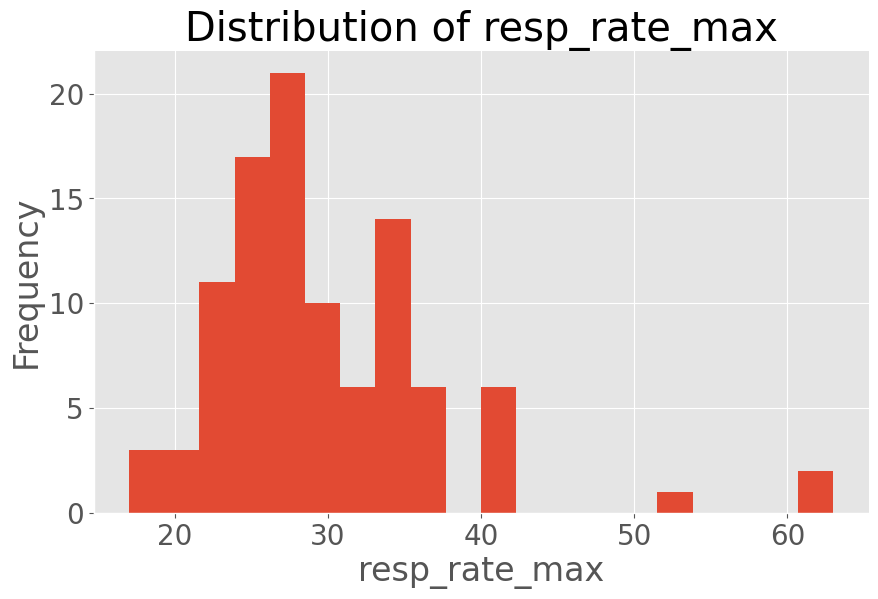

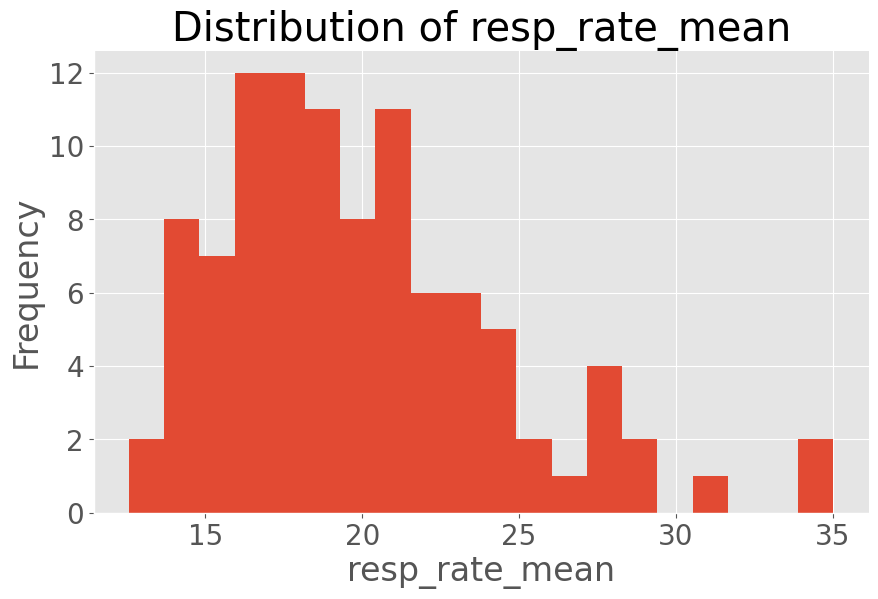

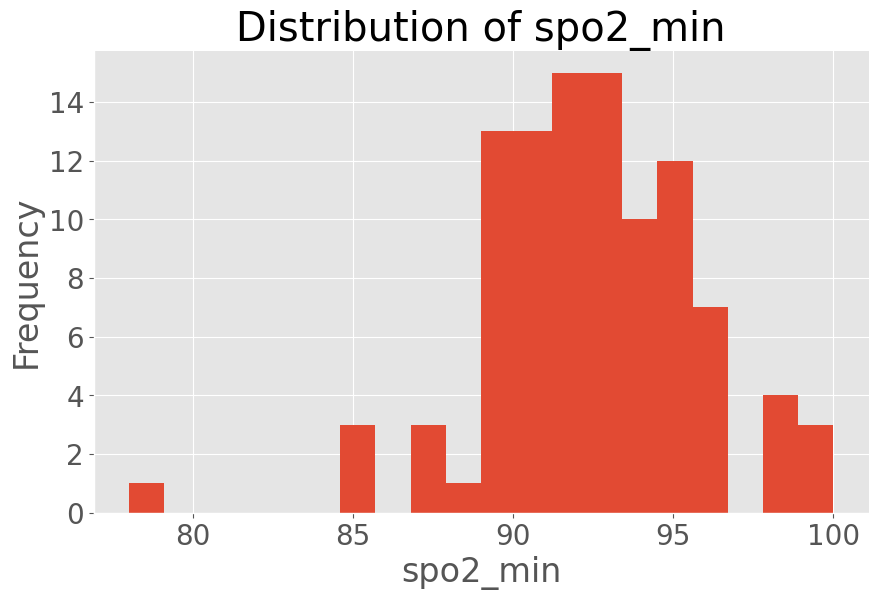

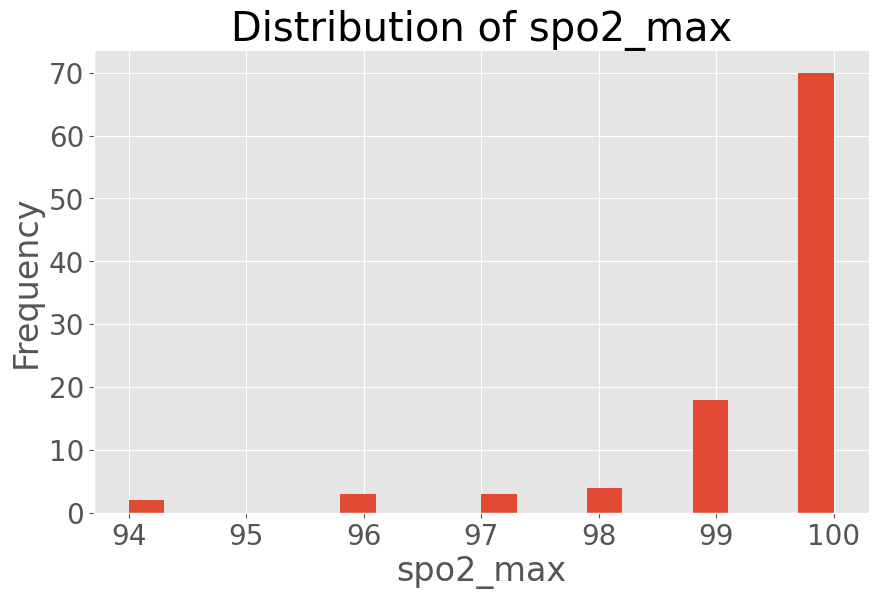

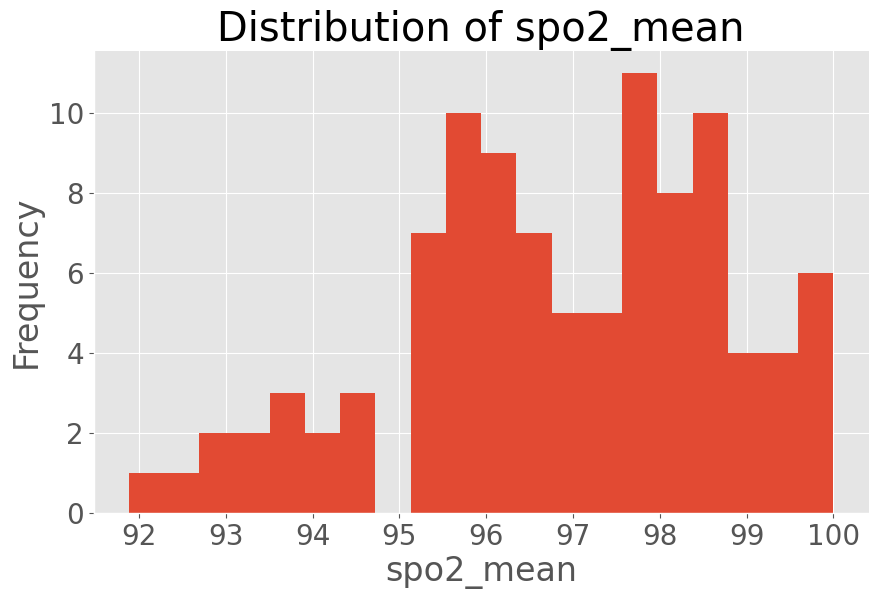

In [ ]:
# Iterate through columns, skipping 'hadm_id' and 'subject_id'
for column in first_day.columns:
  if column not in ['hadm_id', 'subject_id']:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    first_day[column].plot(kind='hist', bins=20, title=f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

#Creatine
*TIME* SERIES DATA:

PK = charttime, stay_id



In [ ]:
creatine=run_query("""SELECT
    s.stay_id, s.hadm_id,subject_id,charttime as charttime_creatine,creat,creat_low_past_48hr,creat_low_past_7day
  FROM physionet-data.mimic_derived.kdigo_creatinine
  JOIN physionet-data.mimic_derived.icustay_detail s
    ON kdigo_creatinine.stay_id=s.stay_id
  LIMIT 10000--for testing only""")
creatine.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,stay_id,hadm_id,subject_id,charttime_creatine,creat,creat_low_past_48hr,creat_low_past_7day
0,31326208,23418362,19120385,2135-06-20 19:00:00,1.0,NaN,NaN
1,31588352,27451501,14545508,2113-10-14 05:45:00,1.4,NaN,NaN
2,34669056,22488977,16470754,2133-10-13 20:00:00,1.1,NaN,NaN
3,37552640,25569826,15455517,2179-10-17 08:05:00,9.1,NaN,NaN
4,31195904,27518916,11234592,2152-08-22 23:44:00,1.5,NaN,NaN


In [ ]:
creatine.describe()

,stay_id,hadm_id,subject_id,charttime_creatine,creat,creat_low_past_48hr,creat_low_past_7day
count,10000.0,10000.0,10000.0,9969,9969.000000,0.0,0.0
mean,35005268.3487,24976382.5653,15036953.3666,2153-12-05 12:30:42.804696,1.489101,NaN,NaN
min,30000153.0,20000808.0,10002013.0,2110-01-18 15:21:00,0.100000,NaN,NaN
25%,32529473.25,22450769.25,12517328.75,2133-10-18 22:45:00,0.800000,NaN,NaN
50%,34999314.0,24981642.0,15107983.5,2153-06-23 03:45:00,1.000000,NaN,NaN
75%,37458125.75,27502149.0,17562772.0,2174-06-17 12:15:00,1.400000,NaN,NaN
max,39997955.0,29998113.0,19998330.0,2210-01-18 14:45:00,35.600000,NaN,NaN
std,2876426.855667,2901675.226112,2894596.124576,NaN,1.645875,NaN,NaN


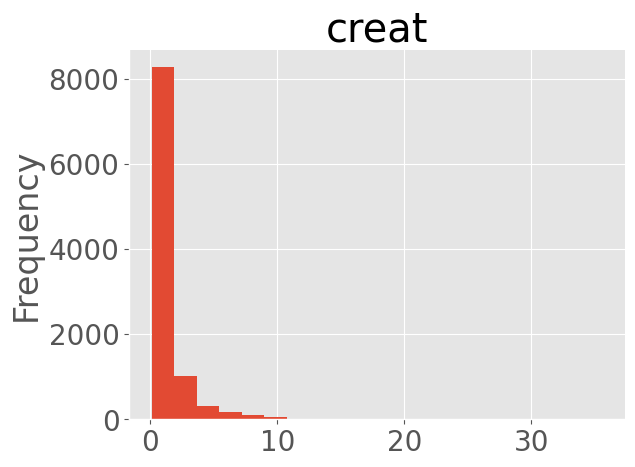

In [ ]:
# @title creat

from matplotlib import pyplot as plt
creatine['creat'].plot(kind='hist', bins=20, title='creat')
plt.gca().spines[['top', 'right',]].set_visible(False)

Example of visualization of a single patient over time

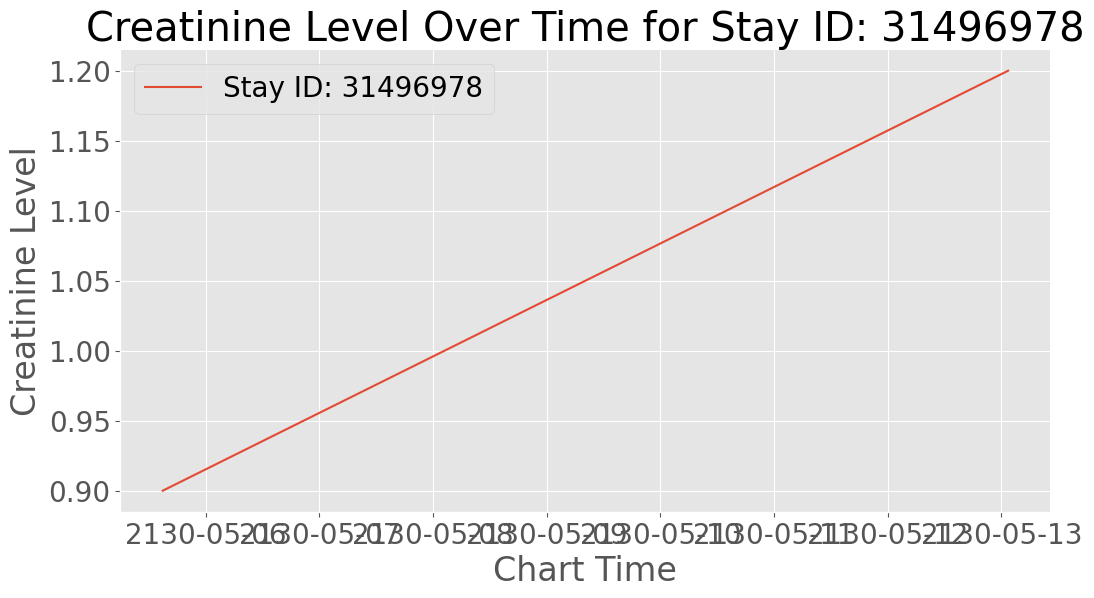

In [ ]:

# Assuming 'creatine' DataFrame is already loaded and contains 'charttime_creatine' and 'creat' columns

# Create a subset of data for plotting, selecting only relevant columns
creatine_subset = creatine[['charttime_creatine', 'stay_id', 'creat']]

# Group the data by 'stay_id' and plot the creatinine level over time for each stay
for stay_id, stay_data in creatine_subset.groupby('stay_id'):
  if len(stay_data) > 1:  # Only plot if there are multiple data points for the stay
    plt.figure(figsize=(12, 6))
    plt.plot(stay_data['charttime_creatine'], stay_data['creat'], label=f'Stay ID: {stay_id}')
    plt.xlabel('Chart Time')
    plt.ylabel('Creatinine Level')
    plt.title(f'Creatinine Level Over Time for Stay ID: {stay_id}')
    plt.legend()
    plt.grid(True)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    # Break the loop after generating 3 plots
    if stay_id >= 3:  # Assuming you want the first 3 stay IDs
        break

# Vitalsign

In [ ]:
vitalsign=run_query("""SELECT
    hadm_id,v.stay_id, v.subject_id,charttime as charttime_vital,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,spo2
  FROM physionet-data.mimic_derived.vitalsign v
  JOIN physionet-data.mimic_derived.icustay_detail s
    ON v.stay_id=s.stay_id
  LIMIT 100--for testing only""")
vitalsign.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,hadm_id,stay_id,subject_id,charttime_vital,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,spo2
0,25730697,38150079,16560909,2180-10-09 05:00:00,52.0,88.0,37.0,49.0,92.0,39.0,50.0,16.5,100.0
1,25557012,36561068,18148913,2186-05-16 03:00:00,114.0,126.0,87.0,95.0,126.0,87.0,95.0,37.0,95.0
2,21238756,37147644,16006840,2201-12-28 13:00:00,85.0,159.0,87.0,106.0,159.0,87.0,106.0,37.0,96.0
3,21873816,34515335,19773589,2136-06-29 19:00:00,83.0,106.0,57.5,71.0,102.0,57.0,66.0,34.0,94.0
4,29181422,38750362,12926897,2135-03-21 13:00:00,82.0,92.5,50.5,62.5,112.0,42.0,59.0,9.0,NaN


In [ ]:
vitalsign.describe()

,hadm_id,stay_id,subject_id,charttime_vital,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,spo2
count,100.0,100.0,100.0,100,98.000000,100.000000,100.000000,99.000000,64.000000,64.000000,63.000000,100.000000,91.000000
mean,24800348.06,35432779.92,15031009.66,2152-09-19 11:49:00,92.285714,127.070000,68.145000,84.904040,130.171875,74.515625,87.317460,27.455000,96.395604
min,20005119.0,30015010.0,10037483.0,2110-07-02 04:00:00,35.000000,29.000000,20.000000,22.000000,50.000000,22.000000,28.000000,5.000000,67.000000
25%,22210205.0,32873711.75,12266335.0,2135-09-29 09:56:15,79.000000,103.750000,38.000000,58.000000,109.750000,49.000000,63.500000,21.250000,95.000000
50%,24762335.5,36264471.5,15263921.0,2151-04-05 10:00:00,92.000000,128.500000,85.000000,95.000000,134.500000,87.000000,99.000000,27.500000,97.000000
75%,27334422.25,37946372.5,17664157.0,2166-04-16 22:00:00,107.750000,151.500000,92.000000,106.500000,150.250000,92.250000,106.000000,35.000000,99.000000
max,29937670.0,39806964.0,19979469.0,2205-12-24 04:00:00,163.000000,216.000000,110.000000,140.000000,200.000000,110.000000,122.000000,47.000000,100.000000
std,2877088.509507,2932674.595845,3081578.065545,NaN,21.799934,35.564994,28.137765,29.580716,29.896942,25.547958,25.035346,10.666689,4.168344


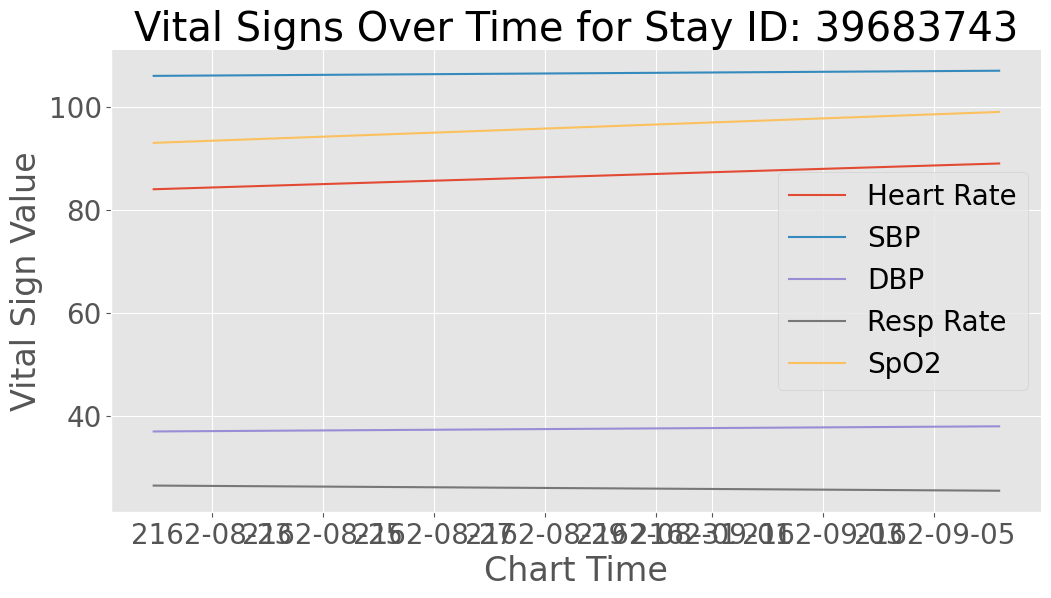

In [ ]:


# Assuming vitalsign DataFrame is already loaded

# Group the data by 'stay_id' and plot the vital signs over time for each stay
for stay_id, stay_data in vitalsign.groupby('stay_id'):
  if len(stay_data) > 1:  # Only plot if there are multiple data points for the stay
    plt.figure(figsize=(12, 6))
    plt.plot(stay_data['charttime_vital'], stay_data['heart_rate'], label='Heart Rate')
    plt.plot(stay_data['charttime_vital'], stay_data['sbp'], label='SBP')
    plt.plot(stay_data['charttime_vital'], stay_data['dbp'], label='DBP')
    plt.plot(stay_data['charttime_vital'], stay_data['resp_rate'], label='Resp Rate')
    plt.plot(stay_data['charttime_vital'], stay_data['spo2'], label='SpO2')

    plt.xlabel('Chart Time')
    plt.ylabel('Vital Sign Value')
    plt.title(f'Vital Signs Over Time for Stay ID: {stay_id}')
    plt.legend()
    plt.grid(True)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    # Break the loop after generating 3 plots
    if stay_id >= 3:  # Assuming you want the first 3 stay IDs
        break

# You can further customize the plot by adjusting the colors, line styles, and axis labels.
# You can also create separate plots for each vital sign if needed.

# Blood differential

In [ ]:
blood_differential=run_query("""SELECT
  subject_id, hadm_id, charttime, specimen_id, eosinophils_abs, eosinophils
  FROM physionet-data.mimic_derived.blood_differential
  LIMIT 100--for testing only""")
blood_differential.head(10)

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,subject_id,hadm_id,charttime,specimen_id,eosinophils_abs,eosinophils
0,13321017,22556631,2159-01-15 06:00:00,25427207,0.00,0.0
1,14670853,22324955,2175-04-25 04:50:00,12879886,0.16,7.0
2,17769329,20971656,2181-12-19 05:55:00,39138722,10.40,8.0
3,18767957,<NA>,2199-04-20 20:30:00,16555967,0.21,6.2
4,12684036,24009672,2133-05-03 00:00:00,31193135,0.00,0.0
5,17277385,29817083,2183-03-28 06:20:00,86626966,0.01,1.0
6,11402083,<NA>,2159-04-08 13:10:00,27788577,73.01,4.9
7,14698539,<NA>,2145-10-12 12:14:00,83352674,0.00,0.0
8,19190224,<NA>,2188-03-14 16:15:00,77753860,8.25,2.5
9,13383248,<NA>,2152-04-14 09:25:00,48233474,12.04,0.7


#Vasosupressors


In [ ]:
vasopressors_input=run_query(""" SELECT subject_id,hadm_id,starttime,endtime,amount,amountuom,label
 FROM physionet-data.mimic_icu.inputevents ie
  LEFT JOIN physionet-data.mimic_icu.d_items i
    ON i.itemid=ie.itemid
  WHERE linksto='inputevents' and category='Medications'
    AND label IN ('Epinephrine','Epinephrine.','Dopamine','Norepinephrine','Dobutamine','Phenylephrine','Angiotensin II (Giapreza)')
    LIMIT 100--for testing only""")
vasopressors_input.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,subject_id,hadm_id,starttime,endtime,amount,amountuom,label
0,12491257,22429534,2175-04-09 07:00:00,2175-04-09 07:28:00,21.705428,mg,Dopamine
1,13331269,26434889,2122-10-03 09:00:00,2122-10-03 12:30:00,97.139198,mg,Dopamine
2,18897747,22953910,2139-08-12 01:00:00,2139-08-12 01:29:00,16.693810,mg,Dopamine
3,18174739,24517521,2131-02-14 05:00:00,2131-02-14 06:15:00,6.192674,mg,Dopamine
4,19203373,24646557,2155-06-08 09:08:00,2155-06-08 09:45:00,8.151277,mg,Dopamine


In [ ]:
vasopressors_input.describe()

,subject_id,hadm_id,starttime,endtime,amount
count,100.0,100.0,100,100,100.000000
mean,14815899.54,25421251.95,2153-03-19 15:27:30,2153-03-19 17:48:03,47.635221
min,10094679.0,20037205.0,2110-04-06 07:38:00,2110-04-06 10:00:00,0.004638
25%,12331534.75,23263147.0,2136-05-26 21:40:00,2136-05-26 22:04:15,0.243558
50%,14704332.5,25866848.5,2150-11-08 09:27:00,2150-11-08 10:11:00,3.555433
75%,17021161.0,27636225.0,2174-03-10 01:44:15,2174-03-10 08:10:00,38.967247
max,19805298.0,29983763.0,2200-09-19 04:00:00,2200-09-19 06:22:00,476.936905
std,2764413.364018,2804380.996794,NaN,NaN,92.602450


#gastrointestinal_chart

In [ ]:
gastrointensintal_chart=run_query("""SELECT subject_id,hadm_id,charttime as charttime_gastro,storetime,value,warning,label
 FROM physionet-data.mimic_icu.chartevents ie
  LEFT JOIN physionet-data.mimic_icu.d_items i
    ON i.itemid=ie.itemid
  WHERE linksto='chartevents' and Category='Toxicology'
  AND label IN ('Nausea and Vomiting (CIWA)','GI Upset (COWS)','Nausea and Vomiting (CINA)')
  AND value NOT IN ("No N/V", "No nausea, no vomiting","No GI symptoms","No nausea, no vomiting.")
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#position_chart

In [ ]:
position_chart=run_query("""SELECT subject_id,hadm_id,charttime as charttime_position,storetime,value,warning,label
 FROM physionet-data.mimic_icu.chartevents ie
  LEFT JOIN physionet-data.mimic_icu.d_items i
    ON i.itemid=ie.itemid
  WHERE linksto='chartevents' and (Category='Treatments' AND label IN ('Position'))
    LIMIT 100--for testing only""")


<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#skin_chart

In [ ]:
skin_chart=run_query("""SELECT subject_id,hadm_id,charttime as charttime_skin,storetime,value,warning,label
 FROM physionet-data.mimic_icu.chartevents ie
  LEFT JOIN physionet-data.mimic_icu.d_items i
    ON i.itemid=ie.itemid
  WHERE linksto='chartevents' and Category='Skin - Assessment'
  AND label IN ('Skin Condition','Skin Integrity','Skin Color', 'Skin Temperature')
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#saline_input

In [ ]:

saline_input=run_query("""SELECT subject_id,hadm_id,starttime,endtime,amount,amountuom,label
 FROM physionet-data.mimic_icu.inputevents ie
  LEFT JOIN physionet-data.mimic_icu.d_items i
    ON i.itemid=ie.itemid
  WHERE linksto='inputevents' and Category='Fluids/Intake'
  AND label IN ('NaCl 0.9%')
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#epinephrine_input

In [ ]:
epinephrine_input=run_query("""SELECT subject_id,hadm_id,starttime,endtime,amount,amountuom,label
 FROM physionet-data.mimic_icu.inputevents ie
  LEFT JOIN physionet-data.mimic_icu.d_items i
    ON i.itemid=ie.itemid
  WHERE linksto='inputevents' and category='Medications'
    AND label IN ('Epinephrine', 'Epinephrine.')
    LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#h1ntihistamines

In [ ]:
h1Antihistamines=run_query("""SELECT Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime, medication, proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
  FROM `physionet-data.mimic_hosp.pharmacy`
  WHERE Medication LIKE '%Cetirizine%' OR Medication LIKE '%Doxylamine%'
  OR Medication LIKE '%Cyproheptadine%' OR Medication LIKE '%Loratadine%'
  OR Medication LIKE '%Hydroxyzine%' OR Medication LIKE '%Olopatadine%'
  OR Medication LIKE '%Ketotifen%' OR Medication LIKE '%Fexofenadine%'
  OR Medication LIKE '%Desloratadine%' OR Medication LIKE '%Azelastine%'
  OR Medication LIKE '%Dimenhydrinate%' OR Medication LIKE '%Promethazine%'
  OR Medication LIKE '%Diphenhydramine%'
  OR Medication LIKE '%Chlorpheniramine%'
  OR Medication LIKE '%Pheniramine%'
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#h2antihistamines

In [ ]:
h2Antihistamines=run_query("""SELECT Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime, medication, proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
  FROM `physionet-data.mimic_hosp.pharmacy`
  WHERE Medication LIKE '%Nizatidine%'
  OR Medication LIKE '%Ranitidine%' OR Medication LIKE '%Famotidine%'
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#bronchodilators

In [ ]:
bronchodilators=run_query("""SELECT Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime, medication, proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
  FROM `physionet-data.mimic_hosp.pharmacy`
  WHERE Medication LIKE '%albuterol%' OR Medication LIKE '%levalbuterol%'
    OR Medication LIKE '%formoterol%'OR Medication LIKE '%terbutaline%'
    OR Medication LIKE '%racepinephrine%' OR Medication LIKE '%arformoterol%'
    OR Medication LIKE '%olodaterol%' OR Medication LIKE '%salmeterol%'
    OR Medication LIKE '%isoproterenol%' OR Medication LIKE '%tiotropium%'
    OR Medication LIKE '%aclidinium%' OR Medication LIKE '%ipratropium%'
    OR Medication LIKE '%glycopyrrolate%' OR Medication LIKE '%theophylline%'
    OR Medication LIKE '%caffeine%'
    LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#glucocorticoids

In [ ]:
glucocorticoids = run_query("""SELECT Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime, medication, proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
  FROM `physionet-data.mimic_hosp.pharmacy`
  WHERE Medication LIKE '%prednylidene%'OR Medication LIKE '%triamcinolone%'
  OR Medication LIKE '%fluorometholone%' OR Medication LIKE '%prednisone%'
  OR Medication LIKE '%beclomethasone dipropionate%' OR Medication LIKE '%betamethasone%'
  OR Medication LIKE '%ciclesonide%' OR Medication LIKE '%clobetasol%'
  OR Medication LIKE '%fluticasone furoate%' OR Medication LIKE '%mometasone%'
  OR Medication LIKE '%cortisone%'
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#vasopressors_pharmasy

In [ ]:
vasopressers_pharmacy=run_query("""SELECT Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime, medication, proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
  FROM `physionet-data.mimic_hosp.pharmacy`
  WHERE Medication LIKE '%phenylephrine%'
  LIMIT 100--for testing only""")

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


#diagnosis

In [ ]:
diagnosis = run_query("""
  SELECT * FROM `physionet-data.mimic_hosp.diagnoses_icd`
  WHERE icd_version=10
  AND (icd_code LIKE 'T780%' OR icd_code LIKE 'T782%'
    OR icd_code LIKE 'T886%' OR icd_code LIKE 'T805%')
  LIMIT 100--for testing only"
""")
diagnosis.head()

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,17743440,20320809,1,T886XXA,10
1,13151205,24727419,1,T7809XA,10
2,17600374,28695895,1,T886XXA,10
3,18109577,24540659,1,T886XXA,10
4,10863078,26102500,1,T782XXA,10


#epinephrine pharmacy

In [74]:
epinephrine_pharmacy=run_query("""SELECT Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime, medication, proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
  FROM physionet-data.mimic_hosp.pharmacy
  WHERE Medication LIKE '%Epinephrine%'""")
epinephrine_pharmacy.head(10)

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


,Subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,route,frequency,disp_sched,doses_per_24_hrs,duration,duration_interval
0,19734722,22851403,87803449,19734722-1352,2127-08-23 08:00:00,2127-09-03 21:00:00,Epinephrine 1:1000,Unit Dose,Discontinued,IM,ONCE:PRN,None,NaN,NaN,Ongoing
1,13370124,23665068,98667169,13370124-100,2126-12-16 08:00:00,2126-12-17 07:00:00,Epinephrine 1:1000,Unit Dose,Expired,IM,ONCE:PRN,None,NaN,1.0,Days
2,19315692,21687414,16997339,19315692-1274,2181-02-27 08:00:00,2181-02-28 07:00:00,Epinephrine 1:1000,Unit Dose,Expired,IM,ONCE:PRN,None,NaN,1.0,Days
3,19923191,28297541,34634963,19923191-423,2144-04-19 08:00:00,2144-04-20 07:00:00,Epinephrine 1:1000,Unit Dose,Expired,IM,ONCE:PRN,None,NaN,1.0,Days
4,19859532,22025309,80462283,19859532-595,2201-03-26 08:00:00,2201-03-27 08:00:00,Epinephrine 1:1000,Unit Dose,Expired,IM,ONCE:PRN,None,NaN,24.0,Hours
5,10079616,27864171,71792215,10079616-286,2132-11-03 14:00:00,2132-11-03 22:00:00,Epinephrine 1:1000,Unit Dose,Discontinued via patient discharge,SC,ONCE MR1:PRN,None,0.0,2.0,Doses
6,14625316,21866982,68425333,14625316-1080,2139-02-19 08:00:00,2139-02-20 07:00:00,Epinephrine 1:1000,Unit Dose,Expired,IM,ONCE:PRN,None,NaN,1.0,Days
7,18300938,22050717,64478891,18300938-633,2178-02-01 08:00:00,2178-02-14 16:00:00,Epinephrine 1:1000,Unit Dose,Discontinued via patient discharge,IM,ONCE:PRN,None,NaN,NaN,Ongoing
8,15114531,22329225,60228748,15114531-5108,2163-11-08 11:00:00,2163-11-09 22:00:00,Epinephrine 1:1000,Unit Dose,Discontinued via patient discharge,IM,ONCE:PRN,None,NaN,NaN,Ongoing
9,11738939,20355239,11280710,11738939-248,2123-01-05 08:00:00,2123-01-06 07:00:00,Epinephrine 1:1000,Unit Dose,Expired,IM,ONCE:PRN,None,NaN,1.0,Days


# Tidying up dataframes for ML

- aspiii
- chemistry
- creatine_baseline
- epinephrine (TS)
- first_day
- creatine
- vitalsign
- vasopressors_input
- gastrointensintal_chart
- position_chart
- skin_chart
- saline_input (TS)
- epinephrine_input (TS)
- h1Antihistamines (TS)
- h2Antihistamines (TS)
- bronchodilators (TS)
- glucocorticoids (TS)
- vasopressers_pharmacy (TS)
- diagnosis

## Aggregating time-series data

In [ ]:
# First, we pick interesting hadms/patiend_ids based off on
# epinephrine
# epineprine_input
# vasosupressors
hadm_ids_epinephrine = epinephrine['hadm_id'].dropna().unique()
hadms_ids_epinephrine_input = epinephrine_input['hadm_id'].dropna().unique()
hadm_ids_vasopressors_input = vasopressors_input['hadm_id'].dropna().unique()

all_hadms = pd.concat([pd.Series(hadm_ids_epinephrine),
                       pd.Series(hadms_ids_epinephrine_input),
                       pd.Series(hadm_ids_vasopressors_input)]).unique()

# This gives us our population to test
# Note: if population seems to big maybe drop a table

# Next, from that population we get interesting data
# aggregated vitalsigns by day DONE
# aggregate creatine lab results by day TODO
# we include (per day) if there was a warning for skin
# "" for gantrointestinal
# aggregated blood differential per day

# Add the column from diagnosis for all patients to test against
# when doing ML

# export resulting table to csv

In [ ]:



# Aggregating vitalsign by stay_id
agg_vitalsign = vitalsign.groupby('hadm_id').agg({
    'stay_id': lambda x: list(x.unique()),  # Store the list of stay_ids under the same hadm_id
    'heart_rate': ['min', 'max', 'mean'],
    'sbp': ['min', 'max', 'mean'],
    'dbp': ['min', 'max', 'mean'],
    'mbp': ['min', 'max', 'mean'],
    'resp_rate': ['min', 'max', 'mean'],
    'spo2': ['min', 'max', 'mean']
}).reset_index()

# Rename the columns after aggregation
agg_vitalsign.columns = ['_'.join(col).strip() for col in agg_vitalsign.columns.values]
agg_vitalsign.rename(columns={'hadm_id_': 'hadm_id'}, inplace=True)  # Ensure 'hadm_id' is correctly named
print(agg_vitalsign.head())

# Aggregating other time-series data like creatinine similarly
# creatine
agg_creatine = creatine.groupby('hadm_id').agg({
    'stay_id': lambda x: list(x.unique()),  # Store the list of stay_ids
    'creat': ['min', 'max', 'mean'],
    'creat_low_past_48hr': 'mean',
    'creat_low_past_7day': 'mean'
}).reset_index()
agg_creatine.columns = ['_'.join(col).strip() for col in agg_creatine.columns.values]
agg_creatine.rename(columns={'hadm_id_': 'hadm_id'}, inplace=True)  # Ensure 'hadm_id' is correctly named
#print(agg_creatine.head())

# epinephrine
agg_epinephrine = epinephrine.groupby('hadm_id').agg({
    'stay_id': lambda x: list(x.unique()),  # Store the list of stay_ids
    'vaso_rate': ['min', 'max', 'mean'],
    'vaso_amount': ['min', 'max', 'mean'],
}).reset_index()
agg_epinephrine.columns = ['_'.join(col).strip() for col in agg_epinephrine.columns.values]

#vasousupressors
# convert label to numeric bucket
vasopressors_input['label'] = vasopressors_input['label'].map({
    'Epinephrine': 1,
    'Dopamine': 2,
    'Norepinephrine': 3,
    'Dobutamine': 4,
    'Phenylephrine': 5,
    'Angiotensin II (Giapreza)': 6
})

# Aggregate vasopressors_input by stay_id
# skip for now
# we would need to create an aggregate column per drug, and then merge

# gastrointensintal_chart
# no numeric values
# use only warning

# skin_chart
# we only care about the warning column
# no need to aggregate

# saline input
# rename amount to saline amount
saline_input.rename(columns={'amount': 'saline_amount'}, inplace=True)
saline_input_agg = saline_input.groupby('hadm_id').agg({
    'saline_amount': ['min', 'max', 'mean'],
}).reset_index()
saline_input_agg.columns = ['_'.join(col).strip() for col in saline_input_agg.columns.values]
saline_input_agg.rename(columns={'hadm_id_': 'hadm_id'}, inplace=True)  # Ensure 'hadm_id' is correctly named

#print(saline_input_agg.head())

# epinephrine input



# Aggregating epinephrine input by stay_id
# Now merge aggregated tables with aspiii and first_day
combined_data = pd.merge(aspiii, agg_vitalsign, on='hadm_id', how='outer')
combined_data = pd.merge(combined_data, agg_creatine, on='hadm_id', how='outer')

combined_data = pd.merge(combined_data, saline_input_agg, on='hadm_id', how='outer')
combined_data.head()

# Continue merging other tables based on hadm_id

# Merge static tables (first_day, creatine_baseline)
#combined_data = pd.merge(combined_data, first_day, on=['subject_id', 'hadm_id'], how='outer')

    hadm_id stay_id_<lambda>  heart_rate_min  heart_rate_max  heart_rate_mean  \
0  20005119       [36288584]            82.0            82.0             82.0   
1  20318099       [32762870]           120.0           120.0            120.0   
2  20345300       [36497306]           130.0           130.0            130.0   
3  20432454       [30460217]            51.0            51.0             51.0   
4  20482954       [33460567]            81.0            81.0             81.0   

   sbp_min  sbp_max  sbp_mean  dbp_min  dbp_max  dbp_mean  mbp_min  mbp_max  \
0    160.0    160.0     160.0     97.0     97.0      97.0    124.0    124.0   
1    174.0    174.0     174.0     89.0     89.0      89.0    129.0    129.0   
2    141.0    141.0     141.0     96.0     96.0      96.0    105.0    105.0   
3     86.0     86.0      86.0     33.0     33.0      33.0     47.0     47.0   
4     51.0     51.0      51.0     26.0     26.0      26.0     31.0     31.0   

   mbp_mean  resp_rate_min  resp_rate_

,subject_id,hadm_id,apsiii,apsiii_prob,hr_score,resp_rate_score,creatinine_score,stay_id_<lambda>_x,heart_rate_min,heart_rate_max,...,spo2_mean,stay_id_<lambda>_y,creat_min,creat_max,creat_mean,creat_low_past_48hr_mean,creat_low_past_7day_mean,saline_amount_min,saline_amount_max,saline_amount_mean
0,<NA>,20000808,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,[35191063],0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN
1,<NA>,20001361,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,[33475095],2.4,2.4,2.4,NaN,NaN,NaN,NaN,NaN
2,<NA>,20002950,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,[32853022],0.6,0.6,0.6,NaN,NaN,NaN,NaN,NaN
3,<NA>,20003008,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,[39637267],6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
4,<NA>,20004775,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,...,NaN,[34102799],3.7,3.7,3.7,NaN,NaN,NaN,NaN,NaN


[link text](https://)# Extracting interesting hadms, for general use

In [ ]:
# Extract distinct hadm_id from each query

hadm_ids_epinephrine = epinephrine['hadm_id'].dropna().unique()
# other epinephrine
...

# Time-series data, if using stay_id, we may need to join it back to hadm_id (assuming both are present in the tables)
hadm_ids_epinephrine = epinephrine['hadm_id'].dropna().unique() if 'hadm_id' in epinephrine.columns else None
hadm_ids_vasopressors_input = vasopressors_input['hadm_id'].dropna().unique()
hadm_ids_saline_input = saline_input['hadm_id'].dropna().unique()

# Combine all hadm_ids into one list
all_hadm_ids = pd.concat([pd.Series(hadm_ids_aspiii),
                          pd.Series(hadm_ids_creatine_baseline),
                          pd.Series(hadm_ids_first_day),
                          pd.Series(hadm_ids_creatine),
                          pd.Series(hadm_ids_epinephrine) if hadm_ids_epinephrine is not None else pd.Series(),
                          pd.Series(hadm_ids_vasopressors_input),
                          pd.Series(hadm_ids_saline_input)]).unique()

# Create a DataFrame to hold all unique hadm_ids
hadm_ids_df = pd.DataFrame(all_hadm_ids, columns=['hadm_id'])

In [ ]:
hadm_ids_list = hadm_ids_df['hadm_id'].tolist()

# Create an SQL query using these hadm_ids
# This is a sample query for one of the tables, you can extend this for others as well
query = f"""
SELECT * FROM physionet-data.mimic_derived.apsiii
WHERE hadm_id IN ({','.join([str(hadm_id) for hadm_id in hadm_ids_list])})
"""

# Execute the query
interesting_data = run_query(query)

<ipython-input-2-0e563464f076>:32: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  return pd.io.gbq.read_gbq(


Maybe this is useful? it's pretty much all the data we have.
It does have a lot of problems, as there is a lot of time series data that can't really be effectively analyzed in this way.

Just first attempt at a simple merging of data from the hadm that seem interesting

In [ ]:
interesting_data.describe()

,subject_id,hadm_id,stay_id,apsiii,apsiii_prob,hr_score,mbp_score,temp_score,resp_rate_score,pao2_aado2_score,...,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score
count,13689.0,13689.0,13689.0,13689.0,13689.000000,13670.0,13644.0,12992.0,13653.0,5435.0,...,13530.0,13542.0,12877.0,13543.0,13504.0,5333.0,7199.0,13582.0,6829.0,12908.0
mean,15030786.944189,24978552.45942,35001076.507123,48.691942,0.152184,3.130358,11.123278,0.867611,6.019263,0.931371,...,0.779453,2.175602,4.561233,5.015728,0.576422,1.609226,1.925823,1.297232,4.212183,7.103812
std,2900530.669854,2893526.496718,2884463.518808,25.093565,0.174127,4.014766,5.230428,2.575446,3.514421,2.939063,...,2.246208,3.180516,4.314818,4.387972,0.959412,3.133789,4.228412,2.055899,4.182137,13.151815
min,10002013.0,20000808.0,30000153.0,0.0,0.011705,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,12490757.0,22463381.0,32521837.0,31.0,0.048756,0.0,7.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,15092026.0,24981815.0,34983439.0,43.0,0.082882,1.0,10.0,0.0,6.0,0.0,...,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0
75%,17559288.0,27485470.0,37477658.0,60.0,0.167926,5.0,15.0,0.0,8.0,0.0,...,0.0,4.0,7.0,7.0,2.0,0.0,0.0,3.0,6.0,8.0
max,19998330.0,29998113.0,39997955.0,184.0,0.986072,17.0,23.0,20.0,18.0,15.0,...,19.0,10.0,15.0,12.0,4.0,11.0,16.0,9.0,12.0,48.0
